In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.charts import Donut, show, output_file

%matplotlib inline
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_colwidth', 200)

In [3]:
data=pd.read_csv('/Volumes/Data/Dropbox/ANIP/Centro de estudios/Encuesta de insercion 2016/data/20170103094151-SurveyExport.csv', encoding='utf-8-sig', low_memory=False)

#Print all the column names
#list(data)

In [4]:
print('Personas que participaron: ', len(data))
print('Personas que completaron la encuesta: ', len(data[data['Status'].str.contains('Complete')]))

Personas que participaron:  1433
Personas que completaron la encuesta:  791


## Cleaning the dataset

In [63]:
data_clean=data[ (data['Status'].str.contains('Complete')) & \
                (data['¿En qué idioma prefiere responder la encuesta? (What language do you prefer to take the survey)'].str.contains('Español')) & \
                (data['Nombre:Nombre y Apellido'].str.lower().str.contains('test') == False ) & \
                ( (data['¿Está cursando actualmente algún programa de Postgrado ya sea en Chile o el Extranjero?'].str.contains('Sí')) | \
                (data['¿Tiene ya algún grado académico de Postgrado obtenido ya sea en Chile o el Extranjero?'].str.contains('Sí')) | \
                (data['¿Está haciendo actualmente algún Postdoctorado ya sea en Chile o el Extranjero?'].str.contains('Sí')) | \
                (data['¿Terminó ya algún Postdoctorado ya sea en Chile o el Extranjero?'].str.contains('Sí')) ) ].copy()

data_clean['Nombre_Correo'] = (data_clean['Nombre:Nombre y Apellido'].str.strip().str.upper() + ' ' + data_clean['Apellido:Nombre y Apellido'].str.strip().str.upper() + ' ' +  data_clean['Correo electrónico'].fillna('').str.strip().str.upper())
data_clean.drop_duplicates(subset='Nombre_Correo', keep='first', inplace=True)

print(len(data_clean))
#data_clean

743


In [70]:
list(enumerate(data_clean.columns.values.tolist()))[21:34]

[(21,
  '¿En qué idioma prefiere responder la encuesta? (What language do you prefer to take the survey)'),
 (22, '¿Cuál es su nacionalidad?'),
 (23,
  '¿Está cursando actualmente algún programa de Postgrado ya sea en Chile o el Extranjero?'),
 (24,
  'Magíster (MSc):Elija los tipos de programas de Postgrado que está cursando actualmente'),
 (25,
  'Doctorado (PhD):Elija los tipos de programas de Postgrado que está cursando actualmente'),
 (26,
  '¿Tiene ya algún grado académico de Postgrado obtenido ya sea en Chile o el Extranjero?'),
 (27,
  'Magíster (MSc):Elija los grados académicos de Postgrado que tiene actualmente'),
 (28,
  'Doctorado (PhD):Elija los grados académicos de Postgrado que tiene actualmente'),
 (29,
  '¿Está haciendo actualmente algún Postdoctorado ya sea en Chile o el Extranjero?'),
 (30, '¿Terminó ya algún Postdoctorado ya sea en Chile o el Extranjero?'),
 (31,
  '¿Tiene algún trabajo en la actualidad?\xa0Considere todos sus trabajos, incluidos los Postgrados y Po

## Create public dataset

In [65]:
data_public = data_clean.ix[:,np.r_[21:34,36:618]].copy()
data_public.reset_index(drop=True, inplace=True)
#data_public

In [91]:
data_public.to_csv('/Volumes/Data/Dropbox/ANIP/Centro de estudios/Encuesta de insercion 2016/data/Encuesta_de_insercion_ANIP_20170103_094151_publico.csv', header=True, index_label='Index' )

## Create dataset of unemployed

In [10]:
#Create data_complete that corresponds to surveys that were totally completed
data_complete=data_clean

In [58]:
data_complete['Nombre']=data_complete['Nombre:Nombre y Apellido']
data_complete['Apellido']=data_complete['Apellido:Nombre y Apellido']

data_complete['Edad']=data_complete['¿Cuál es su edad? Exprésela en años']
#Convert age to numeric
data_complete.loc[:,'Edad'] = data_complete['Edad'].apply(pd.to_numeric)

data_complete['Pais residencia']=data_complete['País:Indique el País y Ciudad donde reside'].copy()
data_complete['Pais residencia'].fillna('Chile', inplace=True)
data_complete['Pais residencia']

data_complete['Nacionalidad']=data_complete['¿Cuál es su nacionalidad?']

data_complete['Postgrado en curso']=data_complete['¿Está cursando actualmente algún programa de Postgrado ya sea en Chile o el Extranjero?']
data_complete['Postgrado finalizado']=data_complete['¿Tiene ya algún grado académico de Postgrado obtenido ya sea en Chile o el Extranjero?']
data_complete['Postdoc en curso']=data_complete['¿Está haciendo actualmente algún Postdoctorado ya sea en Chile o el Extranjero?']
data_complete['Postdoc finalizado']=data_complete['¿Terminó ya algún Postdoctorado ya sea en Chile o el Extranjero?']

data_complete['Postgrado en curso - Magister']=data_complete['Magíster (MSc):Elija los tipos de programas de Postgrado que está cursando actualmente']
data_complete['Postgrado en curso - Doctorado']=data_complete['Doctorado (PhD):Elija los tipos de programas de Postgrado que está cursando actualmente']
data_complete['Postgrado finalizado - Magister']=data_complete['Magíster (MSc):Elija los grados académicos de Postgrado que tiene actualmente']
data_complete['Postgrado finalizado - Doctorado']=data_complete['Doctorado (PhD):Elija los grados académicos de Postgrado que tiene actualmente']

data_complete['Pais - Doctorado']=data_complete['¿En qué país realizó su programa?/Doctorado (PhD)'].copy()
data_complete['Pais - Doctorado'].fillna('Chile', inplace=True)
data_complete['Pais - Doctorado']

data_complete['Disciplina - Doctorado']=data_complete['Disciplina::¿En qué disciplina y área clasificaría su grado de Doctorado (PhD)?/Doctorado (PhD)']
data_complete['Area - Doctorado']=data_complete['Area del conocimiento::¿En qué disciplina y área clasificaría su grado de Doctorado (PhD)?/Doctorado (PhD)']

data_complete['¿Está desempleado?']=data_complete['¿Tiene algún trabajo en la actualidad? Considere todos sus trabajos, incluidos los Postgrados y Postdocs, independientemente de si están o no vinculados a su área de formación.']
data_complete['Numero empleos']=data_complete['¿Cuántos empleos tiene en la actualidad? Incluya los empleos formales e informales.']
#Convert number of employments to numeric
data_complete.loc[:,'Numero empleos']=data_complete['Numero empleos'].replace('5 o más','5').apply(pd.to_numeric)

data_complete['Empleabilidad - Magister']=data_complete['Una vez terminado el Magíster (MSc) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Magíster (MSc)']
data_complete['Empleabilidad - Doctorado']=data_complete['Una vez terminado el Doctorado (PhD) y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización? Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos./Doctorado (PhD)']
data_complete['Empleabilidad - Postdoc']=data_complete['Una vez terminado el Postdoctorado y estando físicamente en Chile ¿Cuánto tiempo tardó en encontrar empleo vinculado a su especialización?\xa0Entiéndase que hacer un nuevo Postgrado o trabajar como Postdoctorado son considerados empleos.']

columns=['Ahorros personales:¿Cómo financió su programa? Marque todas las opciones que correspondan a su caso/Doctorado (PhD)', \
         'Aportes familiares o pareja:¿Cómo financió su programa? Marque todas las opciones que correspondan a su caso/Doctorado (PhD)', \
         'Beca otorgada por un banco:¿Cómo financió su programa? Marque todas las opciones que correspondan a su caso/Doctorado (PhD)', \
         'Beca Presidente de la República:¿Cómo financió su programa? Marque todas las opciones que correspondan a su caso/Doctorado (PhD)', \
         'Beca Volcán Calbuco:¿Cómo financió su programa? Marque todas las opciones que correspondan a su caso/Doctorado (PhD)', \
         'Becas Bicentenario:¿Cómo financió su programa? Marque todas las opciones que correspondan a su caso/Doctorado (PhD)', \
         'Becas Chile:¿Cómo financió su programa? Marque todas las opciones que correspondan a su caso/Doctorado (PhD)', \
         'Becas Nacionales (Chile):¿Cómo financió su programa? Marque todas las opciones que correspondan a su caso/Doctorado (PhD)', \
         'Crédito Corfo:¿Cómo financió su programa? Marque todas las opciones que correspondan a su caso/Doctorado (PhD)', \
         'Crédito otorgado por un banco:¿Cómo financió su programa? Marque todas las opciones que correspondan a su caso/Doctorado (PhD)', \
         'Financiamiento del empleador:¿Cómo financió su programa? Marque todas las opciones que correspondan a su caso/Doctorado (PhD)', \
         'Trabajo no vinculado al área del programa:¿Cómo financió su programa? Marque todas las opciones que correspondan a su caso/Doctorado (PhD)', \
         'Trabajo vinculado al área de conocimiento del programa:¿Cómo financió su programa? Marque todas las opciones que correspondan a su caso/Doctorado (PhD)']

data_complete['Financiamiento - Doctorado'] = data_complete[columns].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

In [64]:
data_unemployed=data_complete[ (data_complete['Postgrado finalizado']=='Sí') & \
                                (data_complete['¿Está desempleado?']=='Sí') & \
#                                data_complete['Pais residencia'].str.contains('Chile') & \
                                data_complete['Empleabilidad - Doctorado'].str.contains('No encontré empleo') ]

data_export=data_unemployed[['Nombre','Apellido','Correo electrónico','Género','¿Cuál es su edad? Exprésela en años','¿Cuál es su estado civil? (Opcional)','Pais residencia','¿Está desempleado?','Empleabilidad - Doctorado','Disciplina - Doctorado','Area - Doctorado','Pais - Doctorado','Financiamiento - Doctorado']]
#data_export

In [62]:
writer = pd.ExcelWriter('/Volumes/Data/Dropbox/ANIP/Centro de estudios/Encuesta de insercion 2016/data/Encuesta_de_insercion_ANIP_20170103_094151_desempleados.xlsx')
data_export.to_excel(writer,'Sheet1')
writer.save()

# Buscando personas que dicen tener un postdoc y que no han hecho magister y tampoco Doc

In [73]:
temp = data_complete[(data_complete['Postgrado finalizado'] == 'No') & (data_complete['Postdoc finalizado'] == 'Sí')]
with pd.option_context('display.max_rows', 10, 'display.max_columns',10):
    print(temp.ix[:, np.r_[200:300]])

     Disciplina::¿En qué disciplina y área clasificaría su Postdoctorado?  \
364                                                                   NaN   
826                                                                   NaN   
1321                                                                  NaN   

     Area del conocimiento::¿En qué disciplina y área clasificaría su Postdoctorado?  \
364                                                                              NaN   
826                                                                              NaN   
1321                                                                             NaN   

     ¿Está realizando su Postdoctorado en Chile?  \
364                                          NaN   
826                                           Sí   
1321                                         NaN   

     ¿En qué país está realizando su Postdoctorado?  \
364                                             NaN   
826                

In [7]:
#Remove html tags from Tipo de contrato
data_complete['Tipo de contrato']=data_complete['¿Qué tipo de relación laboral tiene en este trabajo?/1']
data_complete['Tipo de contrato'].fillna('', inplace=True)

for i in data_complete.index:
    text=data_complete.loc[i,'Tipo de contrato']
    soup = BeautifulSoup(text, "html.parser")
    for match in soup.findAll('span'):
        match.decompose()
    data_complete.loc[i,'Tipo de contrato']=soup.get_text()
    
data_complete['Tipo de contrato']

0             Contrato de trabajo a plazo fijo
3                        Contrato a honorarios
4                           Acuerdo de palabra
6                        Contrato a honorarios
7       Contrato de trabajo a plazo indefinido
9                                             
10            Contrato de trabajo a plazo fijo
12      Contrato de trabajo a plazo indefinido
13                                            
15      Contrato de trabajo a plazo indefinido
16                       Contrato a honorarios
18                          Acuerdo de palabra
19                          Acuerdo de palabra
24                                            
26                                        Otra
                         ...                  
1406                                          
1408                                          
1412                                          
1414                     Contrato a honorarios
1415                                          
1417         

## Now the plots

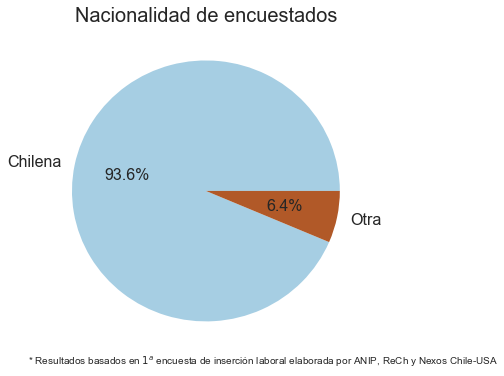

In [8]:
data_plot=data_complete['Nacionalidad'].value_counts()

data_plot.plot.pie(colormap='Paired', autopct='%.1f%%', fontsize=16, figsize=(6, 6))
plt.title('Nacionalidad de encuestados', fontsize=20)
plt.axes().set_ylabel('')
plt.figtext(0.1, 0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/ditribucion_nacionalidad.pdf', bbox_inches='tight')

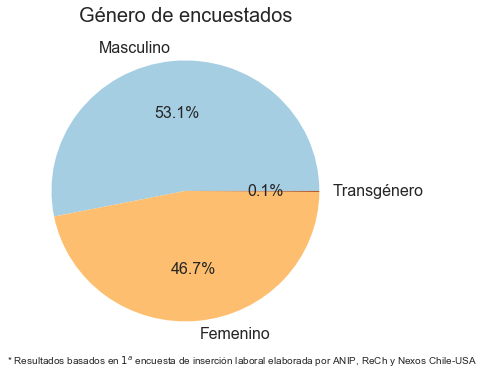

In [9]:
data_plot=data_complete['Género'].value_counts()

data_plot.plot.pie(colormap='Paired', autopct='%.1f%%', fontsize=16, figsize=(6, 6))
plt.title('Género de encuestados', fontsize=20)
plt.axes().set_ylabel('')
plt.figtext(0.1, 0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/ditribucion_genero.pdf', bbox_inches='tight')

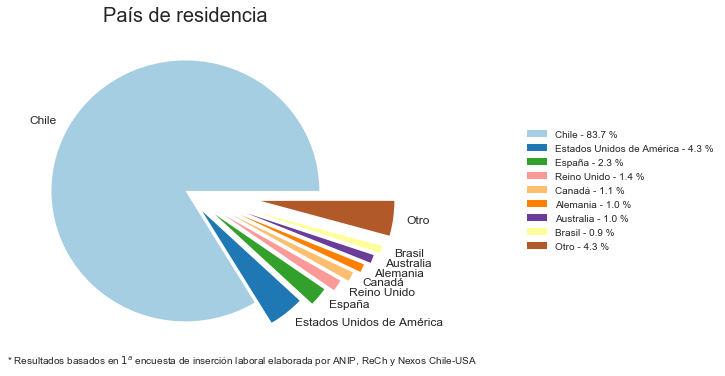

In [10]:
data_top=data_complete['Pais residencia'].value_counts()[0:8]
data_others=pd.Series([np.sum(data_complete['Pais residencia'].value_counts()[8:-1].values)], index=['Otro'])

# Concatenate top 5 and other countries
data_plot=pd.concat([data_top,data_others])

porcent= data_plot.values/np.sum(data_plot.values)*100.
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(data_plot.index, porcent)]

explode = np.sqrt(np.arange(len(data_plot)))*0.2
data_plot.plot(kind='pie', explode=explode, labeldistance=1.1, colormap='Paired', fontsize=12, figsize=(6, 6))
#patches, texts = plt.pie(data_plot.values, startangle=0, radius=1.)
plt.axes().set_ylabel('')
plt.title('País de residencia', fontsize=20)
plt.legend(labels=labels, loc="center", bbox_to_anchor=(1.8, 0.5))
plt.figtext(0.1, 0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/ditribucion_pais_residencia.pdf', bbox_inches='tight')

In [11]:
data_age=data_complete['Edad'].groupby([data_complete['Género'], data_complete['Postgrado en curso'], data_complete['Postgrado finalizado'], data_complete['Postdoc en curso'], data_complete['Postdoc finalizado']]).agg(["count","mean"])

data_age.reset_index(inplace=True)
data_age.rename(columns={'count':'Número de investigadores', 'mean':'Edad promedio'}, inplace=True)
data_age.loc[:,'Edad promedio']=data_age['Edad promedio'].round(1)

print(type(data_age))
print(data_age.columns.tolist())
print(data_age.index)

data_age.sort_values('Número de investigadores', ascending=False)

<class 'pandas.core.frame.DataFrame'>
['Género', 'Postgrado en curso', 'Postgrado finalizado', 'Postdoc en curso', 'Postdoc finalizado', 'Número de investigadores', 'Edad promedio']
RangeIndex(start=0, stop=19, step=1)


,Género,Postgrado en curso,Postgrado finalizado,Postdoc en curso,Postdoc finalizado,Número de investigadores,Edad promedio
2,Femenino,No,Sí,No,No,130,35.6
11,Masculino,No,Sí,No,No,120,35.0
12,Masculino,No,Sí,No,Sí,96,36.9
4,Femenino,No,Sí,Sí,No,62,34.9
17,Masculino,Sí,Sí,No,No,58,32.4
13,Masculino,No,Sí,Sí,No,56,33.5
7,Femenino,Sí,Sí,No,No,52,33.8
3,Femenino,No,Sí,No,Sí,47,37.8
6,Femenino,Sí,No,No,No,37,32.3
14,Masculino,No,Sí,Sí,Sí,36,35.1


In [12]:
data_gender=data_complete[['Género','Edad','Postgrado en curso','Postgrado finalizado','Postdoc en curso','Postdoc finalizado']]

data_plot=pd.DataFrame(columns=['Femenino','Masculino','Transgénero'])
data_plot_lower=pd.DataFrame(columns=['Femenino','Masculino','Transgénero'])
data_plot_higher=pd.DataFrame(columns=['Femenino','Masculino','Transgénero'])

for k in data_gender.keys():
    if (k != 'Género') & (k != 'Edad'):
        data_plot=data_plot.append(data_gender[data_gender[k].str.contains('Sí', na = False)].groupby('Género')[k].count())
        data_plot_lower=data_plot_lower.append(data_gender[(data_gender[k].str.contains('Sí', na = False)) & (data_gender['Edad'] < 35)].groupby('Género')[k].count())
        data_plot_higher=data_plot_higher.append(data_gender[(data_gender[k].str.contains('Sí', na = False)) & (data_gender['Edad'] >= 35)].groupby('Género')[k].count())
        
print(data_plot)
print(data_plot_lower)
print(data_plot_higher)

                      Femenino  Masculino  Transgénero
Postgrado en curso        92.0       91.0          NaN
Postgrado finalizado     306.0      366.0          1.0
Postdoc en curso          77.0       93.0          NaN
Postdoc finalizado        61.0      133.0          1.0
                      Femenino  Masculino  Transgénero
Postgrado en curso        61.0       66.0          NaN
Postgrado finalizado     139.0      183.0          NaN
Postdoc en curso          39.0       53.0          NaN
Postdoc finalizado        17.0       44.0          NaN
                      Femenino  Masculino  Transgénero
Postgrado en curso        31.0       25.0          NaN
Postgrado finalizado     167.0      183.0          1.0
Postdoc en curso          38.0       40.0          NaN
Postdoc finalizado        44.0       89.0          1.0


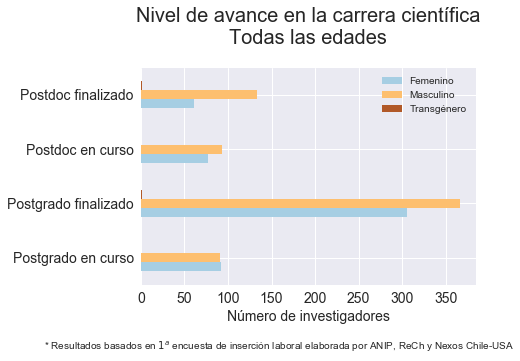

In [13]:
data_plot.plot(kind="barh", colormap='Paired', fontsize=14)
plt.title('Nivel de avance en la carrera científica\nTodas las edades', fontsize=20, y=1.08)
plt.xlabel('Número de investigadores', fontsize=14)
plt.figtext(-0.1, -0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/nivel_avance_carrera_cientifica.pdf', bbox_inches='tight')
plt.savefig('figures/nivel_avance_carrera_cientifica.png', bbox_inches='tight')

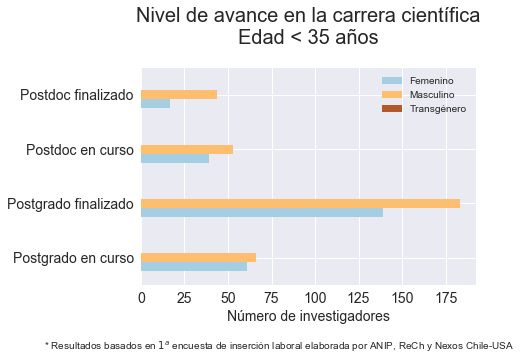

In [14]:
data_plot_lower.plot(kind="barh", colormap='Paired', fontsize=14)
plt.title('Nivel de avance en la carrera científica\nEdad < 35 años', fontsize=20, y=1.08)
plt.xlabel('Número de investigadores', fontsize=14)
plt.figtext(-0.1, -0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/nivel_avance_carrera_cientifica_edad<35.pdf', bbox_inches='tight')

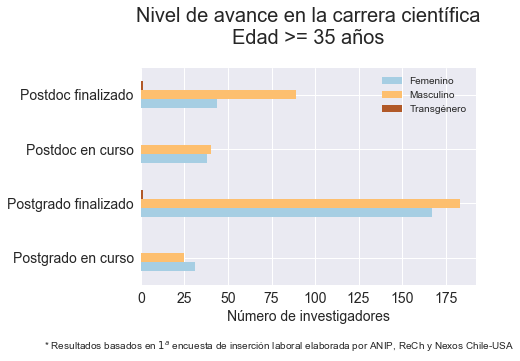

In [15]:
data_plot_higher.plot(kind="barh", colormap='Paired', fontsize=14)
plt.title('Nivel de avance en la carrera científica\nEdad >= 35 años', fontsize=20, y=1.08)
plt.xlabel('Número de investigadores', fontsize=14)
plt.figtext(-0.1, -0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/nivel_avance_carrera_cientifica_edad>35.pdf', bbox_inches='tight')

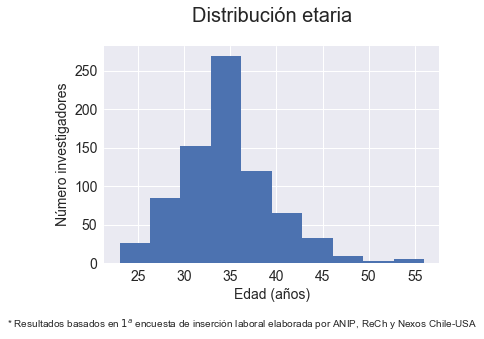

In [16]:
data_plot=data_complete['Edad']

data_plot.plot.hist(fontsize=14)
plt.xlabel('Edad (años)', fontsize=14)
plt.ylabel('Número investigadores', fontsize=14)
plt.title('Distribución etaria', fontsize=20,  y=1.08)
plt.figtext(-0.1, -0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/ditribucion_edad.pdf', bbox_inches='tight')

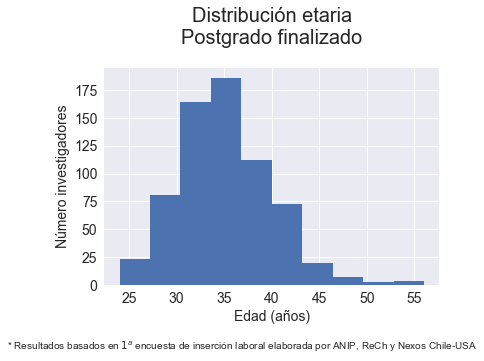

In [17]:
data_plot=data_complete['Edad'][data_complete['Postgrado finalizado']=='Sí']

data_plot.plot.hist(fontsize=14)
plt.xlabel('Edad (años)', fontsize=14)
plt.ylabel('Número investigadores', fontsize=14)
plt.title('Distribución etaria\nPostgrado finalizado', fontsize=20,  y=1.08)
plt.figtext(-0.1, -0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/ditribucion_edad_postgrado_finalizado.pdf', bbox_inches='tight')

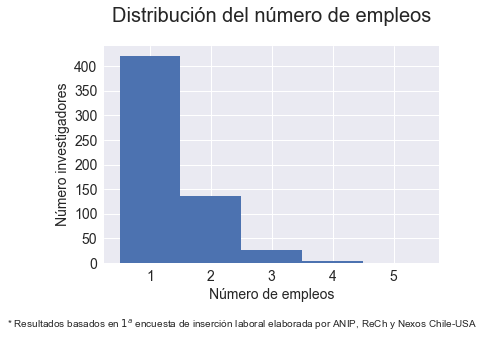

In [18]:
data_complete['Numero empleos'].plot.hist(bins=5, range=(0.5,5.5), fontsize=14)
plt.xlabel('Número de empleos', fontsize=14)
plt.ylabel('Número investigadores', fontsize=14)
plt.title('Distribución del número de empleos', fontsize=20, y=1.08)
plt.figtext(-0.1, -0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/ditribucion_numero_empleos.pdf', bbox_inches='tight')

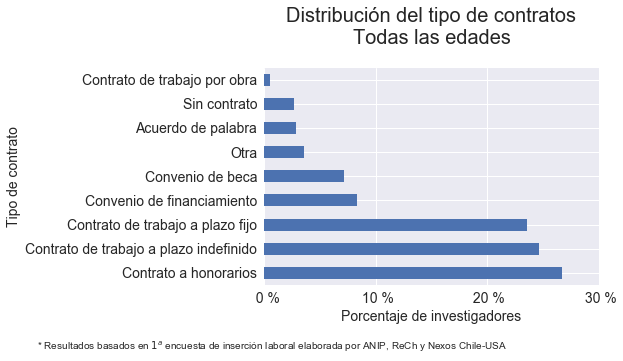

In [25]:
data_plot=data_complete['Tipo de contrato'][data_complete['Numero empleos']>0]

ax=(data_plot.value_counts()/len(data_plot)*100.).plot(kind='barh', fontsize=14)
ax.set_xticks(np.arange(0, 31, 10))
ax.set_xticklabels(['{:3.0f} %'.format(x) for x in ax.get_xticks()])

plt.ylabel('Tipo de contrato', fontsize=14)
plt.xlabel('Porcentaje de investigadores', fontsize=14)
plt.title('Distribución del tipo de contratos\nTodas las edades', fontsize=20, y=1.08)
plt.figtext(-0.4, -0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/ditribucion_tipo_contrato.pdf', bbox_inches='tight')

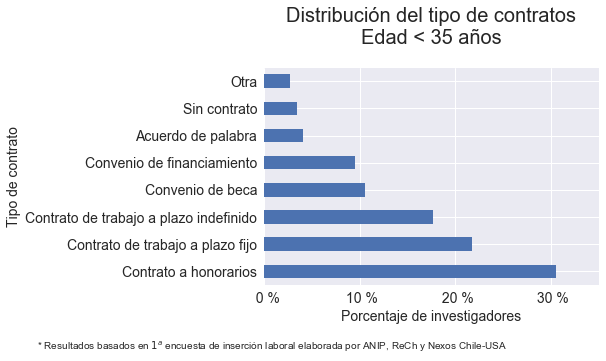

In [38]:
data_plot=data_complete['Tipo de contrato'][(data_complete['Numero empleos']>0) & (data_complete['Edad']<35)]

ax=(data_plot.value_counts()/len(data_plot)*100.).plot(kind='barh', fontsize=14)
ax.set_xlim(0,35)
ax.set_xticks(np.arange(0, 31, 10))
ax.set_xticklabels(['{:3.0f} %'.format(x) for x in ax.get_xticks()])

plt.ylabel('Tipo de contrato', fontsize=14)
plt.xlabel('Porcentaje de investigadores', fontsize=14)
plt.title('Distribución del tipo de contratos\nEdad < 35 años', fontsize=20, y=1.08)
plt.figtext(-0.4, -0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/ditribucion_tipo_contrato_edad<35.pdf', bbox_inches='tight')

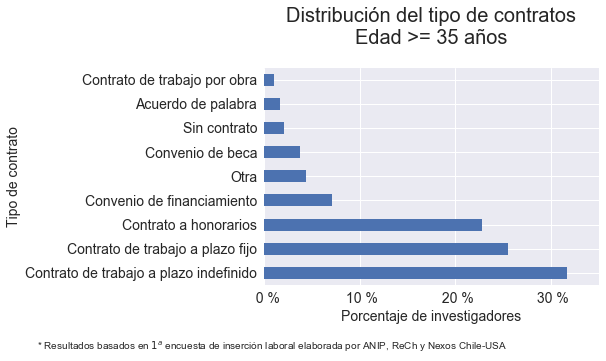

In [39]:
data_plot=data_complete['Tipo de contrato'][(data_complete['Numero empleos']>0) & (data_complete['Edad']>=35)]

ax=(data_plot.value_counts()/len(data_plot)*100.).plot(kind='barh', fontsize=14)
ax.set_xlim(0,35)
ax.set_xticks(np.arange(0, 31, 10))
ax.set_xticklabels(['{:3.0f} %'.format(x) for x in ax.get_xticks()])

plt.ylabel('Tipo de contrato', fontsize=14)
plt.xlabel('Porcentaje de investigadores', fontsize=14)
plt.title('Distribución del tipo de contratos\nEdad >= 35 años', fontsize=20, y=1.08)
plt.figtext(-0.4, -0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/ditribucion_tipo_contrato_edad>35.pdf', bbox_inches='tight')

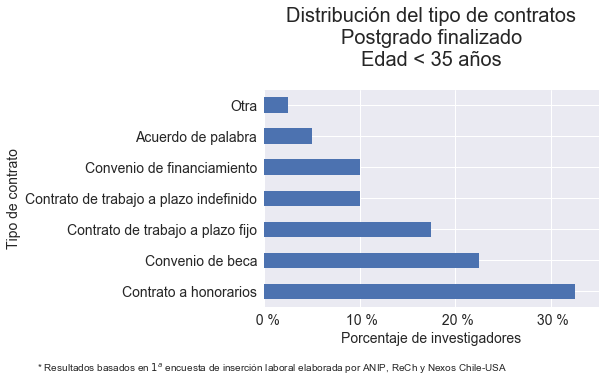

In [42]:
data_plot=data_complete['Tipo de contrato'][(data_complete['Numero empleos']>0) & (data_complete['Edad']<30) & (data_complete['Postgrado finalizado']=='Sí')]

ax=(data_plot.value_counts()/len(data_plot)*100.).plot(kind='barh', fontsize=14)
ax.set_xlim(0,35)
ax.set_xticks(np.arange(0, 31, 10))
ax.set_xticklabels(['{:3.0f} %'.format(x) for x in ax.get_xticks()])

plt.ylabel('Tipo de contrato', fontsize=14)
plt.xlabel('Porcentaje de investigadores', fontsize=14)
plt.title('Distribución del tipo de contratos\nPostgrado finalizado\nEdad < 35 años', fontsize=20, y=1.08)
plt.figtext(-0.4, -0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/ditribucion_tipo_contrato_postgrado_finalizado_edad<35.pdf', bbox_inches='tight')

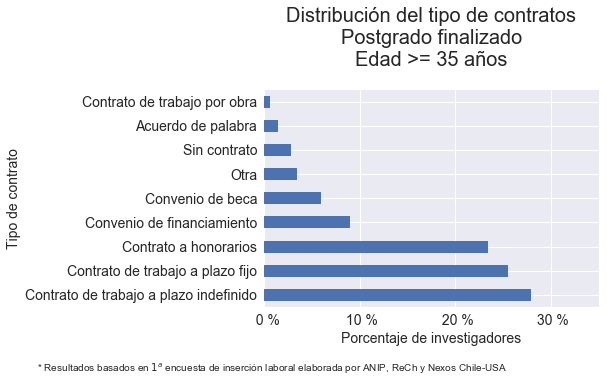

In [43]:
data_plot=data_complete['Tipo de contrato'][(data_complete['Numero empleos']>0) & (data_complete['Edad']>=30) & (data_complete['Postgrado finalizado']=='Sí')]

ax=(data_plot.value_counts()/len(data_plot)*100.).plot(kind='barh', fontsize=14)
ax.set_xlim(0,35)
ax.set_xticks(np.arange(0, 31, 10))
ax.set_xticklabels(['{:3.0f} %'.format(x) for x in ax.get_xticks()])

plt.ylabel('Tipo de contrato', fontsize=14)
plt.xlabel('Porcentaje de investigadores', fontsize=14)
plt.title('Distribución del tipo de contratos\nPostgrado finalizado\nEdad >= 35 años', fontsize=20, y=1.08)
plt.figtext(-0.4, -0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/ditribucion_tipo_contrato_postgrado_finalizado_edad>35.pdf', bbox_inches='tight')

In [37]:
data_unemployed=data_complete[ (data_complete['Postgrado finalizado']=='Sí') & \
                               (data_complete['Empleabilidad - Magister'].str.contains('No econtré empleo') | \
                                data_complete['Empleabilidad - Doctorado'].str.contains('No encontré empleo') | \
                                data_complete['Empleabilidad - Postdoc'].str.contains('No encontré empleo')) ]

print('Numero de investigadores que se declaran desempleados: ', len(data_unemployed.index))
print('Numero de total de investigadores: ', len(data_complete.index))
print('Porcentaje: ', np.round(len(data_unemployed.index)/len(data_complete.index)*100.,1), '%')

Numero de investigadores que se declaran desempleados:  40
Numero de total de investigadores:  791
Porcentaje:  5.1 %


In [45]:
bin_width=2
bin_edges=np.arange(25,50,bin_width)
bin_values=bin_edges[:-1]+bin_width/2

data_plot=pd.DataFrame(columns=['Edad','Rango edad','Numero de investigadores','Tasa de desempleo'])
for i in range(len(bin_values)):
    
    data_age=data_complete[ ((data_complete['Edad'] >= bin_edges[i])  & \
                             (data_complete['Edad'] < bin_edges[i+1]) & \
                             (data_complete['Postgrado finalizado']=='Sí')) ]
    data_unemployed=data_complete[ ((data_complete['Edad'] >= bin_edges[i])  & \
                                    (data_complete['Edad'] < bin_edges[i+1]) & \
                                    (data_complete['Postgrado finalizado']=='Sí')) & \
                                  ((data_complete['Empleabilidad - Magister'].str.contains('No econtré empleo')) | \
                                   (data_complete['Empleabilidad - Doctorado'].str.contains('No encontré empleo')) | \
                                   (data_complete['Empleabilidad - Postdoc'].str.contains('No encontré empleo'))) ]
    
    #print('Age range: ', bin_edges[i:i+2])
    #print('Número de investigadores: ', len(data_age.index))
    #print('Tasa de desempleo: ', np.round(len(data_unemployed.index)/len(data_age.index)*100.,1), '%')
    
    data_plot=data_plot.append( pd.Series( {'Edad':bin_values[i], 'Rango edad':bin_edges[i:i+2], 'Numero de investigadores':len(data_age.index), 'Tasa de desempleo':np.round(len(data_unemployed.index)/len(data_age.index)*100.,1) }), ignore_index=True)

data_plot

,Edad,Rango edad,Numero de investigadores,Tasa de desempleo
0,26.0,"[25, 27]",7.0,0.0
1,28.0,"[27, 29]",29.0,0.0
2,30.0,"[29, 31]",67.0,0.0
3,32.0,"[31, 33]",93.0,5.4
4,34.0,"[33, 35]",125.0,5.6
5,36.0,"[35, 37]",132.0,10.6
6,38.0,"[37, 39]",81.0,4.9
7,40.0,"[39, 41]",56.0,5.4
8,42.0,"[41, 43]",39.0,2.6
9,44.0,"[43, 45]",18.0,16.7


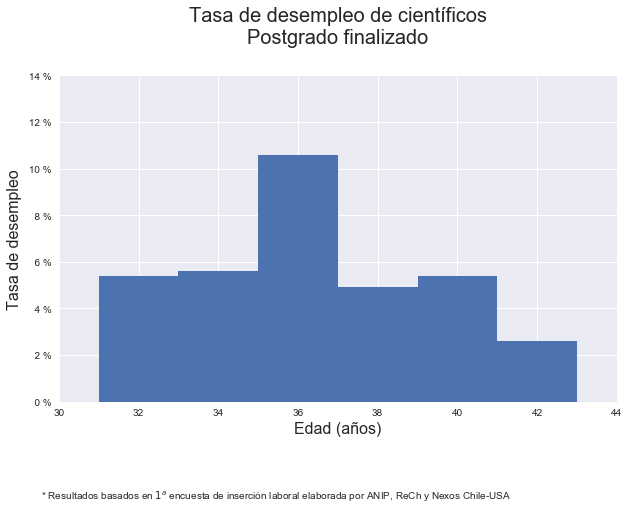

In [47]:
gv=( (data_plot['Edad']>=30) & (data_plot['Edad']<=42) )

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.bar(data_plot['Edad'][gv].values, data_plot['Tasa de desempleo'][gv].values, align='center', width=bin_width)
plt.xlim(30,44)
plt.ylim(0,14)
ax.set_yticklabels(['{:3.0f} %'.format(x) for x in ax.get_yticks()])

plt.xlabel('Edad (años)', fontsize=16)
plt.ylabel('Tasa de desempleo', fontsize=16)
plt.title('Tasa de desempleo de científicos\nPostgrado finalizado', fontsize=20, y=1.08)
plt.figtext(0.1, -0.1, '* Resultados basados en $1^{a}$ encuesta de inserción laboral elaborada por ANIP, ReCh y Nexos Chile-USA', horizontalalignment='left')

plt.savefig('figures/tasa_desempleo_postgrado_finalizado.pdf', bbox_inches='tight')
plt.savefig('figures/tasa_desempleo_postgrado_finalizado.png', bbox_inches='tight')

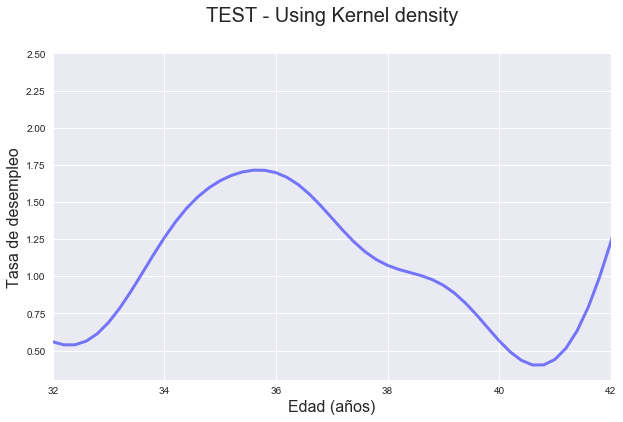

In [51]:
from sklearn.neighbors import KernelDensity

x_plot=np.arange(30,44,0.2)

data_graduate=data_complete[ (data_complete['Postgrado finalizado']=='Sí') ]
log_pdf = KernelDensity(kernel='gaussian', bandwidth=1.).fit(data_graduate['Edad'].values[:, np.newaxis])
data_graduate_pdf = np.exp(log_pdf.score_samples(x_plot[:, np.newaxis]))

data_unemployed= data_complete[ (data_complete['Postgrado finalizado']=='Sí') & \
                                  ((data_complete['Empleabilidad - Magister'].str.contains('No econtré empleo')) | \
                                   (data_complete['Empleabilidad - Doctorado'].str.contains('No encontré empleo')) | \
                                   (data_complete['Empleabilidad - Postdoc'].str.contains('No encontré empleo'))) ]
log_pdf = KernelDensity(kernel='gaussian', bandwidth=1.).fit(data_unemployed['Edad'].values[:, np.newaxis])
data_unemployed_pdf = np.exp(log_pdf.score_samples(x_plot[:, np.newaxis]))


fig, ax = plt.subplots(1,1, figsize=(10,6))
#plt.fill(x_plot, data_unemployed_pdf/data_graduate_pdf, ec='gray', fc='gray', alpha=0.4)
plt.plot(x_plot, data_unemployed_pdf/data_graduate_pdf, color='blue', alpha=0.5, lw=3)
#ax.set_yticklabels(['{:3.0f} %'.format(x) for x in ax.get_yticks()])
plt.xlim(32,42)

plt.xlabel('Edad (años)', fontsize=16)
plt.ylabel('Tasa de desempleo', fontsize=16)
plt.title('TEST - Using Kernel density', fontsize=20, y=1.08)
#plt.title('TEST - Using Kernel density\nTasa de desempleo de científicos\nPostgrado finalizado', fontsize=20, y=1.08)


#print( data_unemployed_pdf/data_graduate_pdf)